### entrainement sur les donnee de lundi

Features utilisées pour l'entraînement :
[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Fl

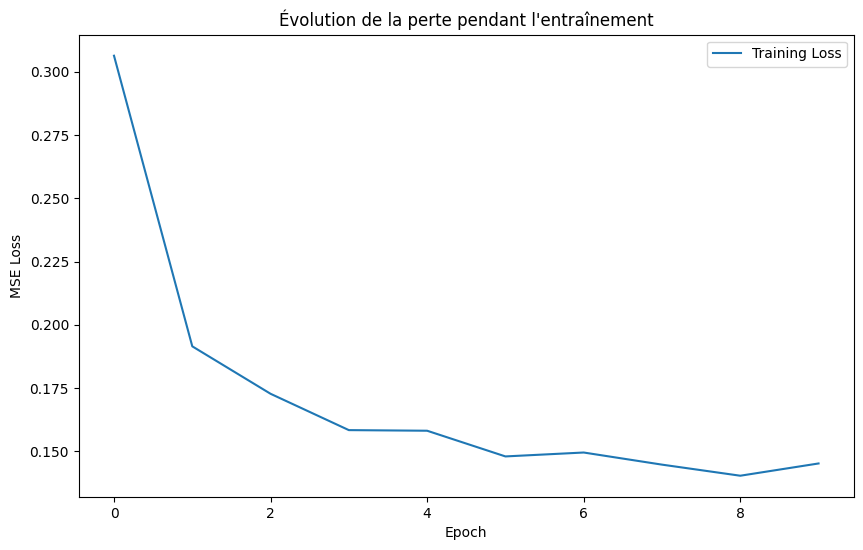

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense

# Charger les données du lundi
df = pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")

# Nettoyage : supprimer les colonnes non numériques
df = df.select_dtypes(include=[np.number])

# Supprimer les colonnes contenant des valeurs infinies ou NaN
df = df.replace([np.inf, -np.inf], np.nan).dropna()

print("Features utilisées pour l'entraînement :")
print(df.columns.tolist())
print(f"Nombre de features utilisées pour l'entraînement : {len(df.columns)}")

# Normaliser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Architecture de l'autoencodeur
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)
decoded = Dense(16, activation="relu")(encoded)
output_layer = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer="adam", loss="mse")

# Entraînement du modèle avec historique
history = autoencoder.fit(
    data_scaled, 
    data_scaled, 
    epochs=10, 
    batch_size=32, 
    shuffle=True
)

#! Sauvegarder l'historique des erreurs
np.save("training_errors.npy", history.history['loss'])

#! Sauvegarder le modèle et le scaler
autoencoder.save("autoencoder_model.keras")
np.save("scaler_mean.npy", scaler.mean_)
np.save("scaler_scale.npy", scaler.scale_)

# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')  # <-- MAINTENANT DISPONIBLE
plt.title('Évolution de la perte pendant l\'entraînement')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


2025-05-08 14:58:59.316770: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 14:58:59.431884: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-08 14:58:59.476856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746712739.564890    8358 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746712739.583827    8358 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746712739.766292    8358 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - loss: 0.4057
Epoch 2/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - loss: 0.2085
Epoch 3/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.1690
Epoch 4/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.1416
Epoch 5/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.1366
Epoch 6/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.1559
Epoch 7/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - loss: 0.1169
Epoch 8/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.1188
Epoch 9/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - loss: 0.1260
Epoch 10/10
16547/16547 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 0.1363


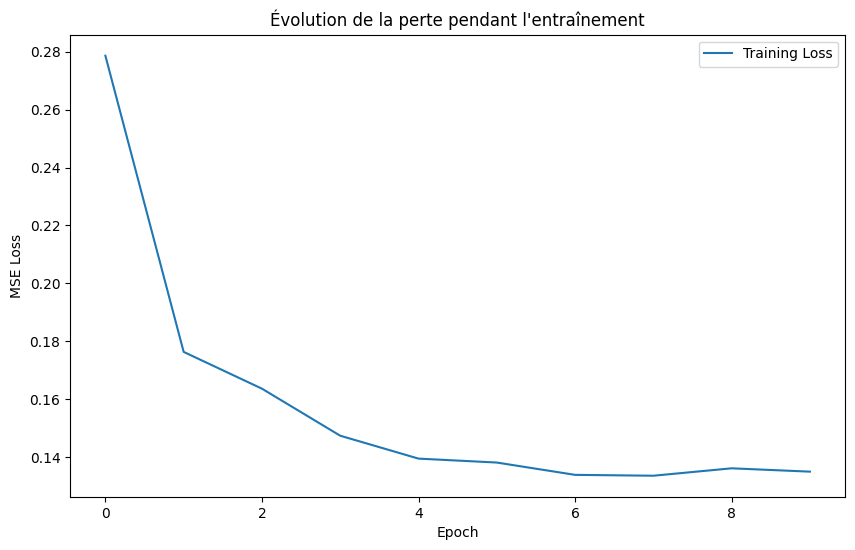

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Model
from keras.layers import Input, Dense

# Charger les données du lundi
df = pd.read_csv("Monday-WorkingHours.pcap_ISCX.csv")

# Nettoyage : supprimer les colonnes non numériques
df = df.select_dtypes(include=[np.number])

# Supprimer les colonnes contenant des valeurs infinies ou NaN
df = df.replace([np.inf, -np.inf], np.nan).dropna()

print("Features utilisées pour l'entraînement :")
print(df.columns.tolist())
print(f"Nombre de features utilisées pour l'entraînement : {len(df.columns)}")

# Normaliser les données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Architecture de l'autoencodeur
input_dim = data_scaled.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation="relu")(input_layer)
encoded = Dense(8, activation="relu")(encoded)
decoded = Dense(16, activation="relu")(encoded)
output_layer = Dense(input_dim, activation="linear")(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer="adam", loss="mse")

# Entraînement du modèle avec historique
history = autoencoder.fit(
    data_scaled, 
    data_scaled, 
    epochs=10, 
    batch_size=32, 
    shuffle=True
)

#! Sauvegarder l'historique des erreurs
np.save("training_errors.npy", history.history['loss'])

#! Sauvegarder le modèle et le scaler
autoencoder.save("autoencoder_model.keras")
np.save("scaler_mean.npy", scaler.mean_)
np.save("scaler_scale.npy", scaler.scale_)

# Visualisation de la courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')  # <-- MAINTENANT DISPONIBLE
plt.title('Évolution de la perte pendant l\'entraînement')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 1. Courbe d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Évolution de la perte pendant l\'entraînement')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('training_loss.png')
plt.close()

# 2. Histogramme des erreurs de reconstruction
reconstructions = autoencoder.predict(data_scaled)
mse = np.mean(np.power(data_scaled - reconstructions, 2), axis=1)

plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, log=True)
plt.title('Distribution des erreurs de reconstruction')
plt.xlabel('Erreur quadratique moyenne (MSE)')
plt.ylabel('Nombre d\'échantillons (log)')
plt.savefig('reconstruction_errors.png')
plt.close()

# 3. Comparaison des features originales vs reconstruites (exemple pour 3 features)
features_to_plot = [0, 1, 2]  # Sélectionnez les indices des features à visualiser
original = scaler.inverse_transform(data_scaled)
reconstructed = scaler.inverse_transform(reconstructions)

plt.figure(figsize=(15, 5))
for i, feat_idx in enumerate(features_to_plot):
    plt.subplot(1, 3, i+1)
    plt.scatter(original[:500, feat_idx], reconstructed[:500, feat_idx], alpha=0.5)
    plt.plot([min(original[:, feat_idx]), max(original[:, feat_idx])], 
             [min(original[:, feat_idx]), max(original[:, feat_idx])], 'r--')
    plt.title(f'Feature {df.columns[feat_idx]}')
    plt.xlabel('Original')
    plt.ylabel('Reconstruit')
plt.tight_layout()
plt.savefig('feature_comparison.png')
plt.close()

# 4. Visualisation de l'espace latent (PCA)
encoder = Model(inputs=input_layer, outputs=encoded)
latent_representation = encoder.predict(data_scaled[:1000])  # Sous-échantillon pour performance

pca = PCA(n_components=2)
latent_pca = pca.fit_transform(latent_representation)

plt.figure(figsize=(10, 6))
plt.scatter(latent_pca[:, 0], latent_pca[:, 1], alpha=0.5)
plt.title('Espace latent (PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.savefig('latent_space_pca.png')
plt.close()

print("Visualisations générées avec succès!")

16547/16547 ━━━━━━━━━━━━━━━━━━━━ 15s 884us/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Visualisations générées avec succès!
